janomeについて

https://note.nkmk.me/python-janome-tutorial/

globについて

https://techacademy.jp/magazine/18928

In [6]:
from janome.tokenizer import Tokenizer
import re
import glob##パス名を取得

In [28]:
##ほんとは　序章部分も回すべき
no_zero = glob.glob("アルマーク/序章/*") 
no_zero

['アルマーク/序章/N9407FU-5.txt',
 'アルマーク/序章/N9407FU-4.txt',
 'アルマーク/序章/N9407FU-3.txt',
 'アルマーク/序章/N9407FU-2.txt',
 'アルマーク/序章/N9407FU-1.txt']

In [8]:
## transer用
no_zero =  ["Transer/N7235FU-8.txt"]

In [29]:
lines = open(no_zero[4],"r",encoding="utf-8")

#\n を削除した文章化(\u3000 は全角空白？) はしない
lines = lines.read()##re.sub(r"[akira]","",text.read())
        
t = Tokenizer()
##streams = [print(token) for token in t.tokenize(lines)]

In [22]:
import collections
def parse_voc(text):
    t = Tokenizer()
    
    ##助動詞 or 助詞 + 別の品詞 + 、。 が来るまで合体させる
    vocs = []
    voc = ""##vocを合体させる部分
    before_voc = ""##前回のvoc字ズラのまま
    before_nomal_voc = ""##前回のvoc言い切り型
    before_word_type = ""
    remove = ["助動詞","助詞"]
    split_norm = ["数","代名詞"]##名刺でも取り除く(分解する分類)                #\u3000は全角空白?
    split_symbol = ["、","。","(",")","「","」","　'","’","'",'"',"“","『","』","[","]","【","】","「",' 「"']##記号は含めないが、ここで上手に分解する  "がなぜか &quot; になる

    for token in t.tokenize(text):#[”。”]は無理矢理処理数を増やすため
        ##print(token)
        now_word_type = token.part_of_speech.split(",")[0]
        
        ##助詞・助動詞の処理 + 、。の処理 + 改行や空白(\u3000)の時の処理
        if now_word_type in remove or token.surface in split_symbol or token.part_of_speech.split(",")[1] == "空白":
            voc += before_nomal_voc##動詞を切りのいい形で代入
            if voc:##空語(助詞・助動詞で生まれる)を取り除く
                vocs.append(voc)
            voc = ''
            before_word_type = ""
            before_nomal_voc = ""
        
        ##前回と同じ品詞 = 分割ミス として一つ前の変換値を繋げる + 名詞-数字の連鎖を断つための処理(この時、前が接頭辞かを確認すべき)
        elif before_word_type == "接頭詞" or (before_word_type == now_word_type and token.part_of_speech.split(",")[1] not in split_norm):
            voc += before_voc
            ##初期化
            before_voc = token.surface ##今の単語の字ズラままを入れる
            before_nomal_voc = token.base_form ##今の単語を読み切りの形に
            before_word_type = now_word_type##品詞変更
        else:
            voc += before_nomal_voc
            ##空語(助詞・助動詞で生まれる)を取り除く 
            if voc:
                vocs.append(voc)##前回までの単語を追加
                voc=""
            
            ##初期化
            before_voc = token.surface ##今の単語の字ズラままを入れる
            before_nomal_voc = token.base_form ##今の単語を読み切りの形に
            before_word_type = now_word_type##品詞変更
            
    ##集めた単語を返す
    return vocs

#c = collections.Counter(vocs)
#c

In [23]:
def concat_voc(dir_name):
    file_names = glob.glob(dir_name+"/*")
    voc_list = []
    
    ##print(file_names)
    for file_name in file_names:
        with open(file_name,"r",encoding="utf-8") as f:
            file = f.read().replace("&quot;",'"')
            ##あとがき部分を見つける
            end = file.find("************************************************")
            ##前書き部分を見つける
            start = file.find("********************************************")
            
            ##前書きがない場合
            if start == end:
                start = 0
            ##あとがきがない場合
            if end == -1:
                end = len(file)-1
            
            ##あとがき, 前書きの削除
            file = file[start:end]
            
            ##題名以降の部分を見つける
            main_start = file.find("\n")
            ##print(file)
            voc_list += parse_voc(file[main_start:])
        
    return voc_list

### WordCloud
https://qiita.com/Senple/items/1ad08b1a7ac9560bef62

In [24]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

fpath = "hannari/Hannari.otf"##日本語文字化けを防ぐ(ダウンロードしたもの)

##フォルダ(章)ごとのlistを生成
def make_cloud_and_lists(chapter_folders):
    voc_lists= []
    for chapter_folder_name in chapter_folders:
        voc_list = concat_voc(chapter_folder_name)
        voc_lists.append(voc_list)
        c = collections.Counter(voc_list)
    
        words = ""
        for word in voc_list:
            words = words + " " + word
        
    
        wordcloud =  WordCloud(background_color="white",
                               font_path=fpath,
                               width=800,
                               height=500).generate(words)
        ##WordCloudの表示
        print(chapter_folder_name)
        plt.figure(figsize=(30,24))
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.show()
    
        print(c)
        print("\n\n")
    
    return voc_lists

アルマーク/序章


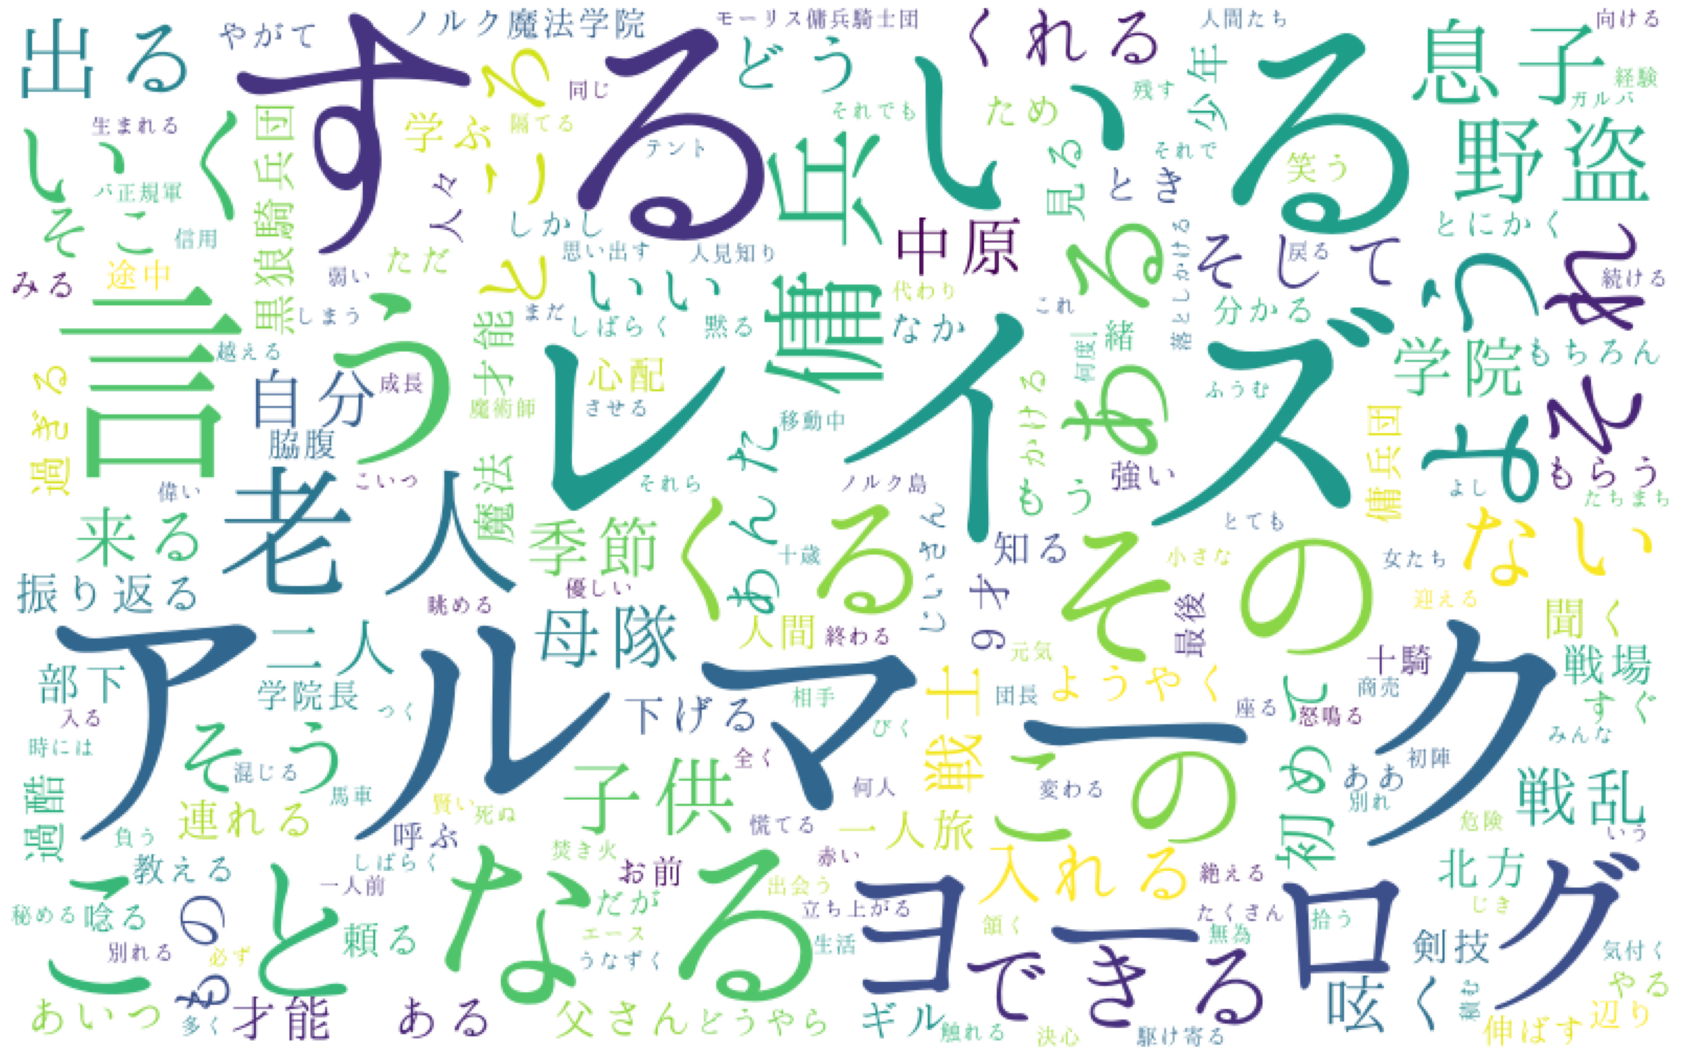

Counter({'アルマーク': 56, 'する': 53, 'レイズ': 52, 'いる': 47, '言う': 28, 'なる': 25, 'ヨーログ': 23, '彼': 21, 'の': 21, 'こと': 20, 'その': 18, 'ある': 15, 'くる': 13, '老人': 13, 'よう': 13, '旅': 11, 'この': 11, 'いく': 10, '傭兵': 10, '北': 9, 'それ': 9, 'できる': 9, 'ない': 9, 'ん': 9, '才能': 9, '息子': 8, '父': 8, '……': 8, '野盗': 8, 'そう': 7, 'ところ': 7, '出る': 7, '頭': 7, '子供': 6, '冬': 6, '入れる': 6, 'くれる': 6, '日': 6, 'いい': 6, 'そして': 6, 'どう': 6, '母隊': 6, '俺': 6, '顔': 6, 'もの': 5, '季節': 5, 'さ': 5, '戦士': 5, '中原': 5, '春': 5, '戦乱': 5, 'そこ': 5, '初めて': 5, '来る': 5, '二人': 5, '自分': 5, '何': 5, 'しばらく': 5, '手': 5, '呟く': 5, '学院': 5, 'あんた': 5, '９才': 4, '一人旅': 4, '過酷': 4, '過ぎる': 4, '学ぶ': 4, '少年': 4, '姿': 4, 'ようやく': 4, '剣': 4, '聞く': 4, '戦場': 4, '北方': 4, '父さん': 4, '黒狼騎兵団': 4, '黙る': 4, '声': 4, '子': 4, 'とき': 4, 'もう': 4, '振り返る': 4, '見る': 4, '魔法': 4, '連れる': 4, '下げる': 4, 'あいつ': 4, '部下': 4, '傭兵団': 3, '心': 3, '敵': 3, '命': 3, '剣技': 3, 'もらう': 3, '頼る': 3, '人間': 3, 'なか': 3, 'ため': 3, '人々': 3, '心配': 3, '知る': 3, '夏': 3, '南': 3, 'すぐ': 3, 'ノルク魔法学院': 3, '教える': 3, '目': 3

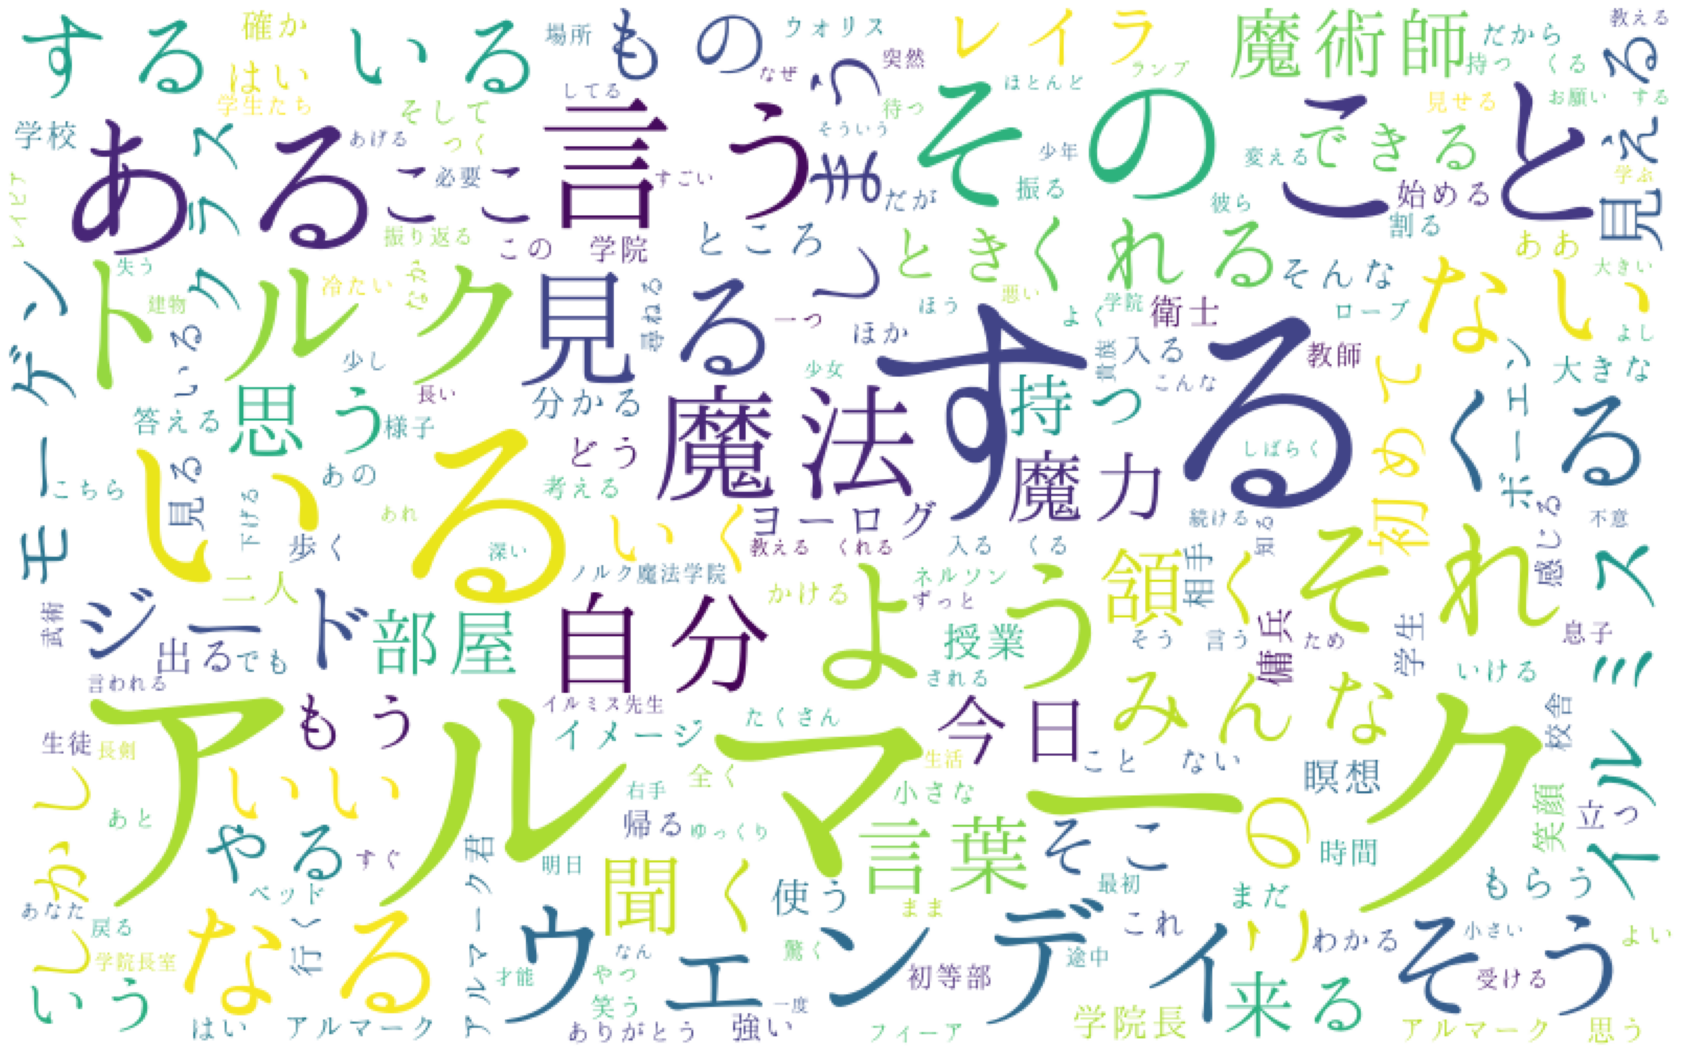

Counter({'アルマーク': 334, 'する': 305, 'いる': 268, 'の': 152, 'こと': 140, '……': 124, 'ある': 97, 'その': 95, 'よう': 89, '言う': 85, 'トルク': 83, '見る': 79, 'くる': 76, 'ウェンディ': 74, '君': 73, 'ん': 70, 'ない': 70, 'それ': 69, 'なる': 68, 'そう': 67, '魔法': 58, '目': 55, '？': 52, 'この': 49, '自分': 46, '彼': 45, 'くれる': 44, '思う': 42, 'ジード': 40, 'みんな': 39, '何': 39, '僕': 38, '顔': 37, '中': 37, 'いい': 36, 'イルミス': 34, '頷く': 33, '聞く': 33, 'しまう': 33, '北': 33, '体': 32, '炎': 32, '言葉': 31, 'はい': 31, '持つ': 31, 'もの': 31, 'ここ': 31, '声': 31, '授業': 28, '今': 28, 'いく': 28, 'モーゲン': 27, '父': 27, '魔力': 26, '今日': 25, '！': 25, '剣': 25, '魔術師': 25, 'しかし': 24, 'やる': 24, 'できる': 24, '杖': 24, '石': 24, '前': 23, '来る': 23, '入る': 23, '部屋': 23, 'そこ': 23, '見える': 23, 'レイラ': 23, 'いう': 21, 'とき': 21, '初めて': 21, 'クラス': 21, 'もう': 21, '灯': 21, 'ヨーログ': 21, '子': 20, 'ところ': 20, '学院': 19, 'ボーエン': 19, '手': 19, '使う': 18, 'どう': 18, '寮': 18, '出る': 18, '私': 18, '傭兵': 17, '二人': 17, '力': 17, 'もらう': 17, 'そんな': 17, '瞑想': 17, '学院長': 16, '誰': 16, '気': 16, '分かる': 16, 'イメージ': 16, '

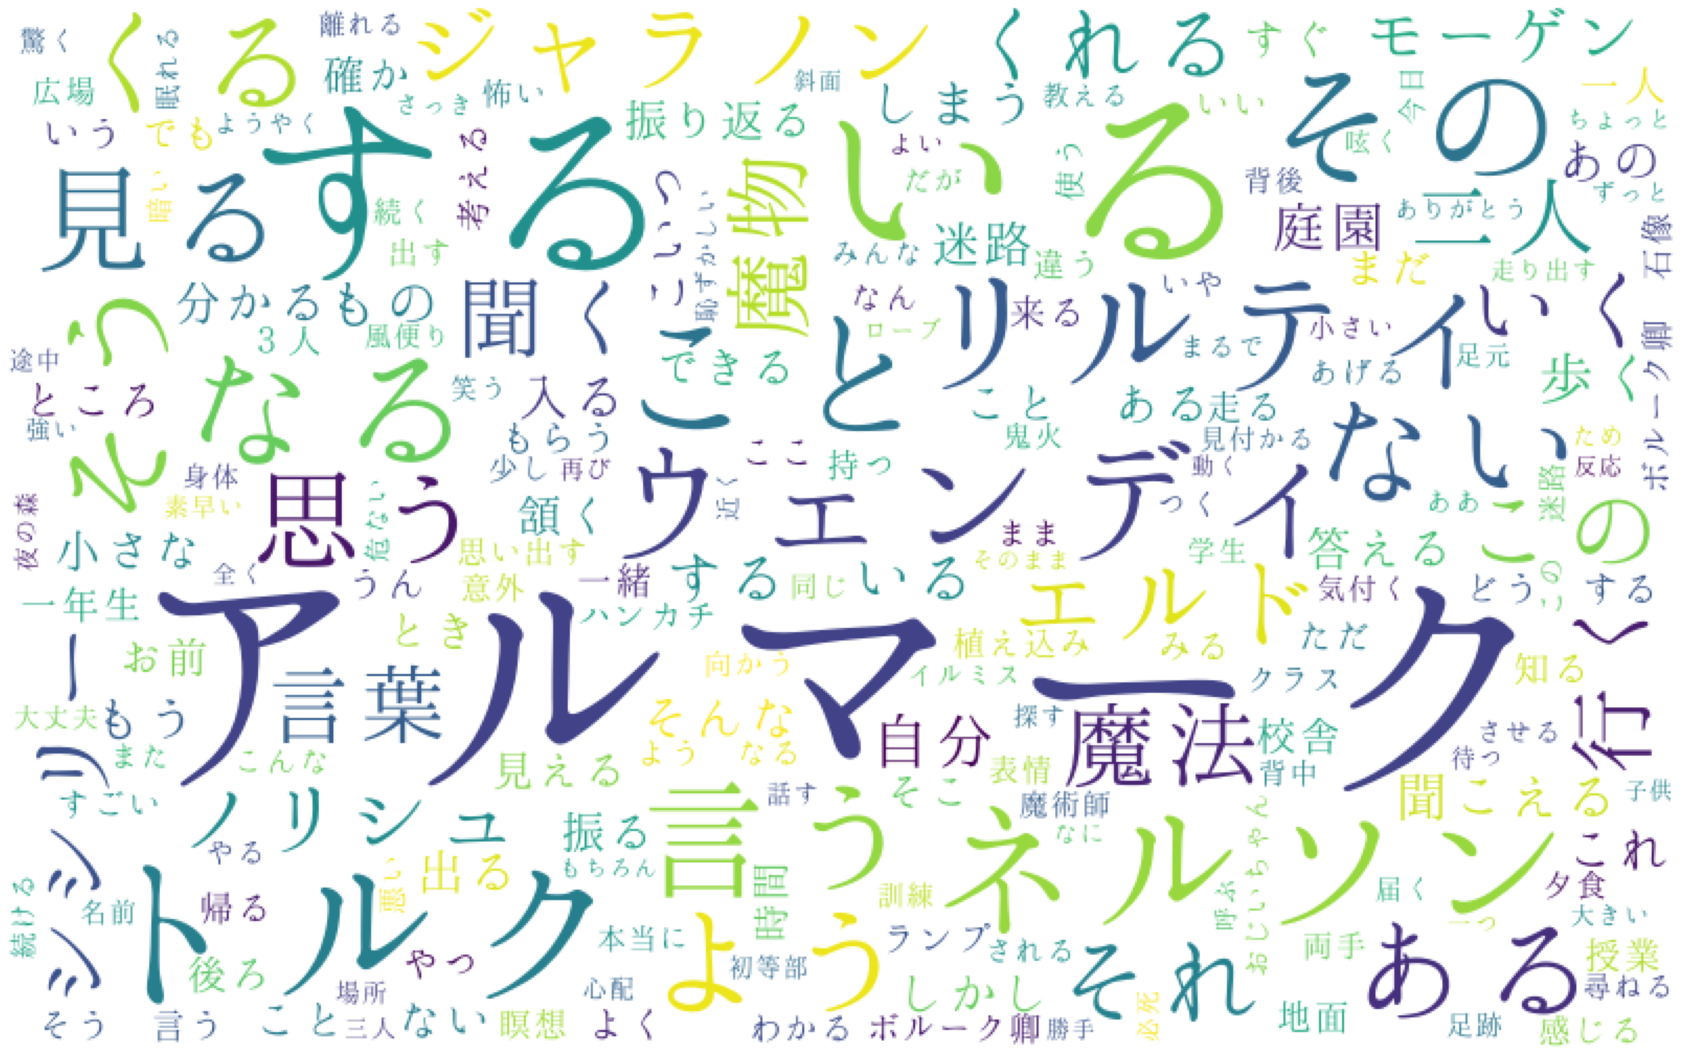

Counter({'アルマーク': 279, 'する': 197, 'いる': 190, 'こと': 120, 'の': 113, '……': 108, 'トルク': 97, 'ネルソン': 79, 'なる': 78, 'ない': 74, 'その': 73, '声': 71, '言う': 71, '？': 71, 'そう': 68, 'ウェンディ': 68, 'リルティ': 68, 'ある': 66, 'よう': 65, '森': 60, 'ん': 59, '！': 53, '見る': 51, 'くる': 51, 'この': 45, '魔法': 44, '思う': 43, 'ジャラノン': 40, 'それ': 40, 'エルド': 39, '風': 39, '顔': 36, '何': 34, 'いく': 32, '魔物': 32, '二人': 32, '行く': 32, 'シシリー': 32, '聞く': 31, 'くれる': 30, '言葉': 30, 'ノリシュ': 30, 'モーゲン': 30, '話': 28, '迷路': 26, '目': 25, '自分': 25, '音': 24, '今': 24, '歩く': 23, 'もの': 22, '時': 22, '庭園': 22, 'しまう': 21, '入る': 21, '聞こえる': 21, '僕': 20, 'ボルーク卿': 20, 'これ': 19, 'あの': 19, '俺': 19, '中': 19, 'そんな': 19, '分かる': 18, 'しかし': 18, 'こいつ': 18, 'もう': 18, '気': 18, '出る': 18, '人': 17, '日': 17, '小さな': 17, '答える': 17, '誰': 17, '振り返る': 16, 'できる': 16, '振る': 16, 'ところ': 16, '寮': 16, 'どう': 16, '頷く': 16, 'とき': 16, '見える': 15, 'お前': 15, '一人': 15, 'すぐ': 15, '道': 15, '術': 15, 'まだ': 15, '確か': 15, 'そこ': 14, '後ろ': 14, '方': 14, '校舎': 14, '石像': 14, '瞑想': 14, '首': 13, 'で

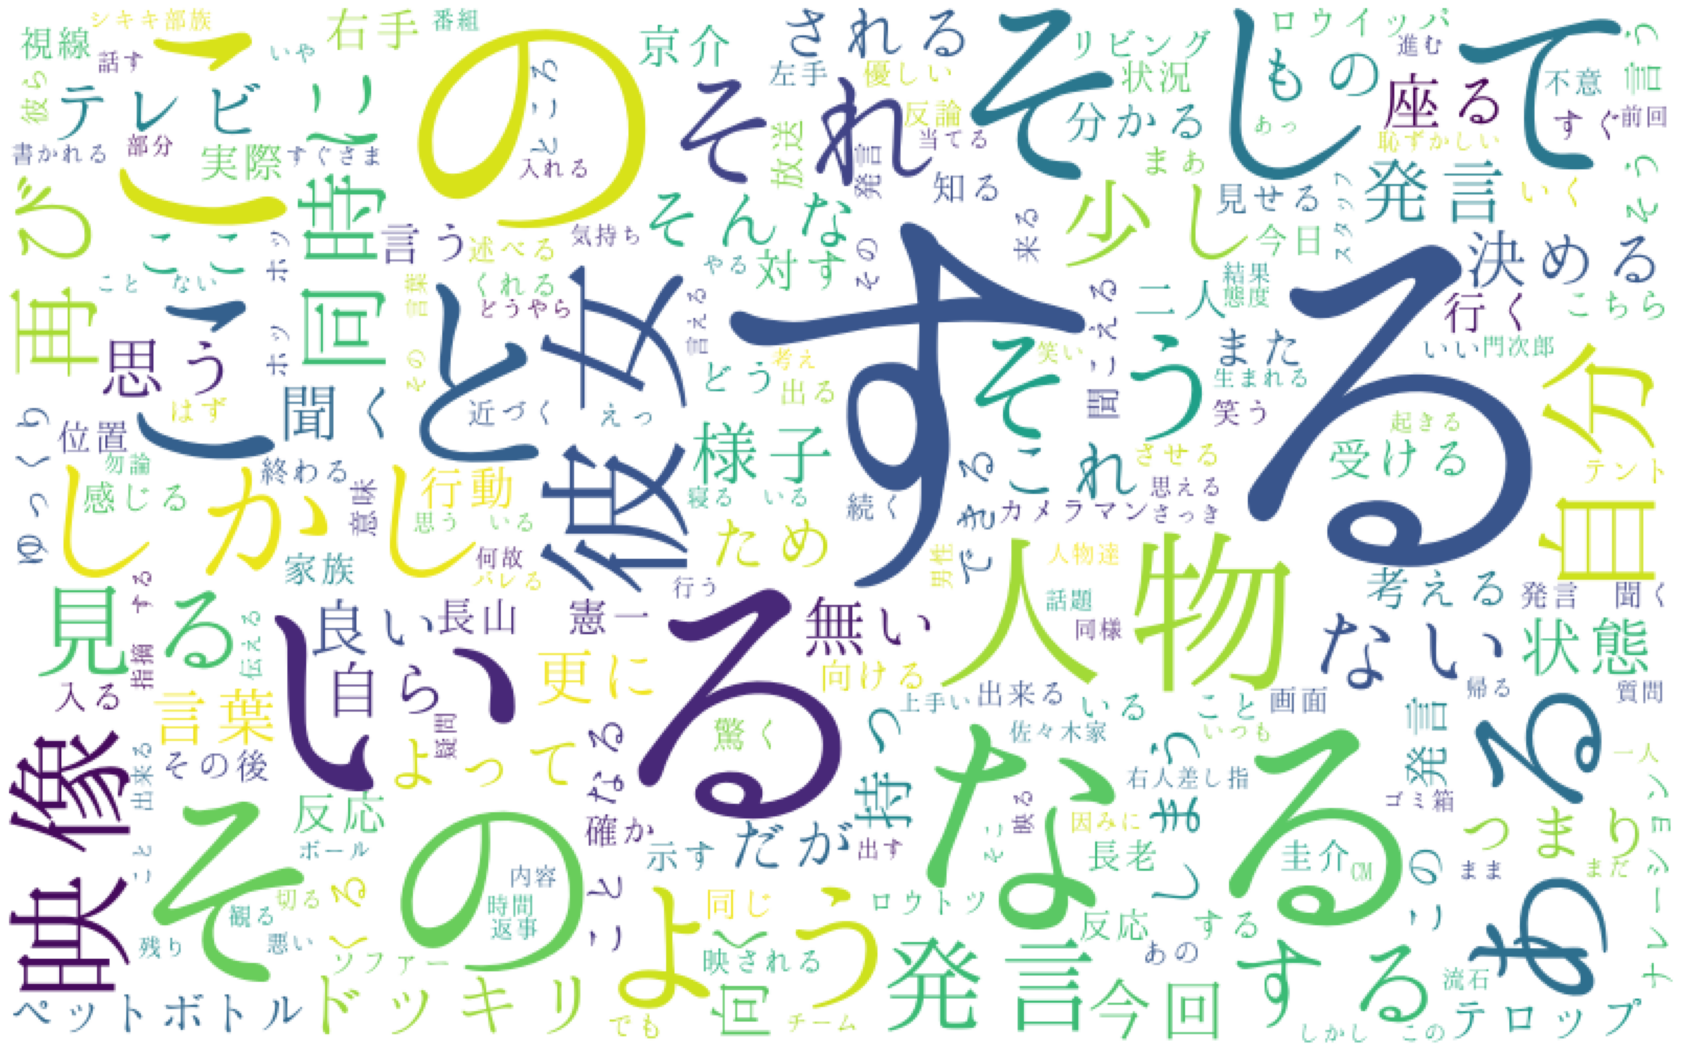

Counter({'する': 843, 'いる': 345, 'この': 314, 'こと': 247, '姉': 234, 'なる': 226, '僕': 226, '発言': 187, 'その': 181, 'の': 159, '人物': 157, '！': 146, 'そして': 137, '父': 134, 'ある': 125, '彼': 117, '彼女': 113, 'そう': 112, 'しかし': 108, 'よう': 106, '......': 95, '？': 94, 'それ': 86, '母': 85, '方': 82, '声': 73, 'ない': 72, '映像': 72, '見る': 71, '反応': 68, '....': 68, '為': 66, '自分': 66, '時': 66, '人': 64, '思う': 63, '聞く': 62, 'テレビ': 61, '中': 59, '同時に': 57, '少し': 57, '再び': 56, 'ドッキリ': 56, 'そんな': 54, '心': 54, '言う': 53, 'くる': 51, 'これ': 51, 'される': 51, '顔': 50, '受ける': 50, '話': 50, '様子': 50, '向く': 50, 'さ': 49, '今回': 47, '言葉': 47, '無い': 44, '〜': 44, '何': 44, '様': 44, '自ら': 43, '考える': 43, 'が': 42, '持つ': 41, 'よって': 41, '状態': 41, 'テロップ': 41, 'ん': 40, '今': 40, '事': 40, 'もの': 40, '決める': 38, '良い': 37, 'つまり': 37, 'しまう': 36, '状況': 36, '長山': 36, '家族': 35, 'ため': 35, '前': 34, '入る': 33, '座る': 33, 'できる': 33, '更に': 33, 'ここ': 32, '出来る': 32, 'だが': 32, 'ペットボトル': 32, '出る': 31, '対す': 31, '聞こえる': 30, '目': 30, '盾': 30, '二人': 29, '行動': 29, 'ロウイッパ': 

In [25]:
##アルマーク
chapter_folder = glob.glob("アルマーク/*")
almark_lists = make_cloud_and_lists(chapter_folder)

##Transer
chapter_folder = glob.glob("Transer/*")
transer_lists = make_cloud_and_lists(chapter_folder)

In [13]:
[print(token) for token in t.tokenize(u"予想通りアルマーク")]

予想	名詞,サ変接続,*,*,*,*,予想,ヨソウ,ヨソー
通り	名詞,接尾,一般,*,*,*,通り,ドオリ,ドーリ
アル	名詞,固有名詞,人名,名,*,*,アル,アル,アル
マーク	名詞,サ変接続,*,*,*,*,マーク,マーク,マーク


[None, None, None, None]